### Yusif Hajizade CS-020 id: 22022735
# Morphological Operators

In [30]:
# import cv2, numpy and matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Create load_img() function that create and return a black image (600x600) that contains a white text 'ABCDE' with thickness = 25 and font scale = 5
def load_img():
    img = np.zeros((600, 600, 3), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'ABCDE', (50, 300), font, 5, (255, 255, 255), 25)
    return img

In [32]:
# create display_img(img) function that takes as input an image and display it with cmap = 'gray'
def display_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [33]:
# Call load_img() function to create img
img = load_img()


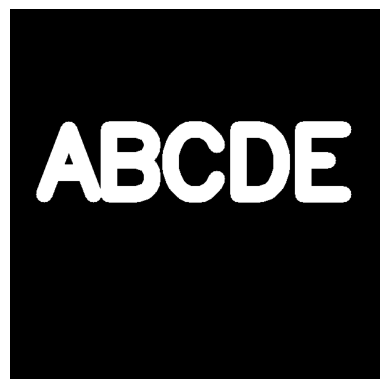

In [34]:
# Call display_img(img) function to display img
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [35]:
# Create a 5x5 kernel of ones
kernel = np.ones((5, 5), np.uint8)

# Apply the erosion operation to the image
eroded_img = cv2.erode(img, kernel, iterations=1)

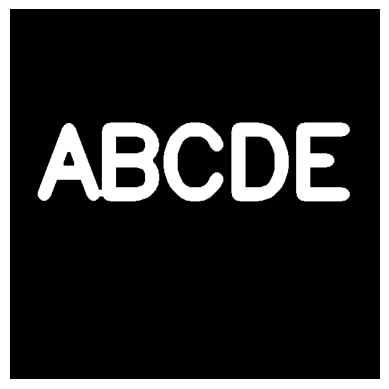

In [36]:
# Display the eroded image
display_img(eroded_img)

In [37]:
# Call load_img() to get the original image
img = load_img()

# Create a 5x5 kernel
kernel = np.ones((5,5),np.uint8)

# Apply the erosion operation to the image with iterations = 4
eroded_img = cv2.erode(img, kernel, iterations=4)

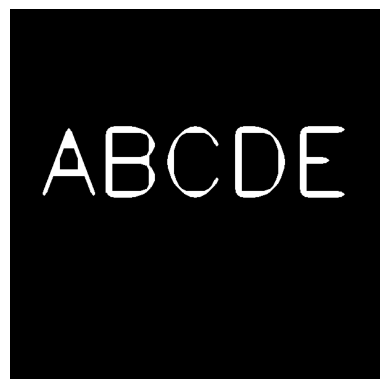

In [38]:
# Display the eroded image
display_img(eroded_img)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [39]:
# Load the original image
img = load_img()

In [40]:
# Create the white_noise 600x600 matrix that contains zeros and ones randomly
white_noise = np.random.randint(0, 2, (600, 600))

In [41]:
# Display the white_noise
print("array([\n", white_noise,"])")

array([
 [[0 0 1 ... 1 0 0]
 [0 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 ...
 [1 1 0 ... 0 1 0]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 1 1]] ])


In [42]:
#multiply white_noise x 255
white_noise *= 255

In [43]:
print(white_noise.shape)

(600, 600)


In [44]:
# Convert the original image to grayscale for (600, 600) instead of (600, 600, 3) which is RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

(600, 600)


In [45]:
# Add the white_noise to the original image img (a simple + operator)
noise_img = img + white_noise

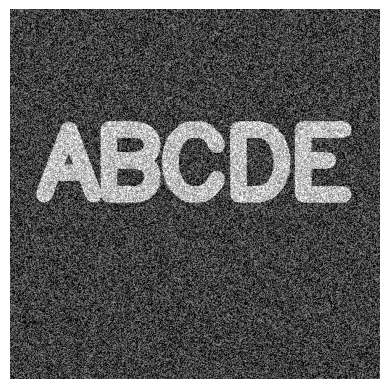

In [46]:
# call display_img to display noise_img
display_img(noise_img)

In [47]:
# Convert noise_img to uint8
noise_img = np.uint8(noise_img)

# Apply the morphological operation
opened_img = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

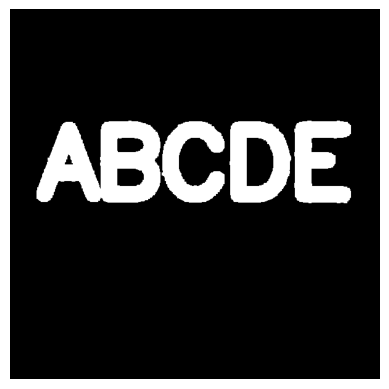

In [48]:
# Display the opened image
display_img(opened_img)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [49]:
# load_img again
img = load_img()

In [50]:
# create the black_noise 600x600 matrix that contains zeros and ones randomly
black_noise = np.random.randint(0, 2, (600, 600))

In [51]:
print("array([\n", black_noise,"])")

array([
 [[1 0 1 ... 0 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 0 1]
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]] ])


In [52]:
# multiply the black_noise by -255
black_noise *= -255


In [53]:
# Convert the original image to grayscale for (600, 600) instead of (600, 600, 3) which is RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add the black_noise to the original image img (a simple + operator)
black_noise_img = img + black_noise

In [54]:
# Display the noisy image
print("array([\n",black_noise_img,"])") 

array([
 [[-255    0 -255 ...    0 -255 -255]
 [-255    0 -255 ... -255 -255 -255]
 [-255 -255    0 ... -255 -255    0]
 ...
 [-255 -255 -255 ...    0    0 -255]
 [-255    0    0 ... -255 -255    0]
 [   0    0    0 ...    0    0 -255]] ])


In [55]:
# put all -255 pixels as zero
black_noise_img[black_noise_img < 0] = 0

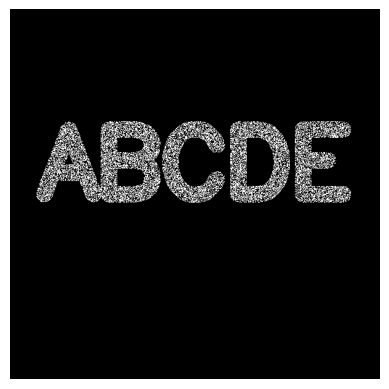

In [56]:
#display_img
display_img(black_noise_img)

In [57]:
# Convert black_noise_img to uint8 data type
black_noise_img = np.uint8(black_noise_img)

# Create a closing kernel
closing_kernel = np.ones((5, 5), np.uint8)

# Apply the closing operation on the noised image
closed_img = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, closing_kernel)

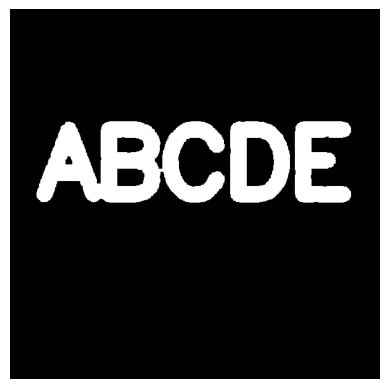

In [58]:
# Display the result
display_img(closed_img)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [59]:
# Load the original image
img = load_img()

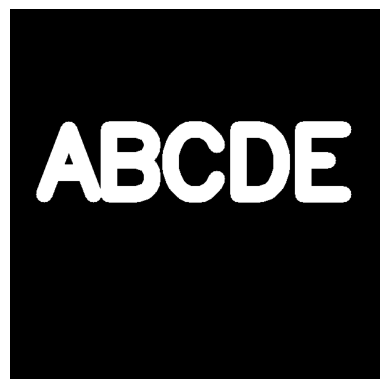

In [60]:
# Display the original image
display_img(img)

In [61]:
# Apply the MORPH_GRADIENT operation on the original image
gradient_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

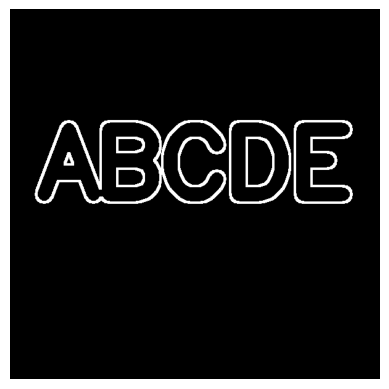

In [62]:
# Display the image after MORPH_GRADIENT operation
display_img(gradient_img)

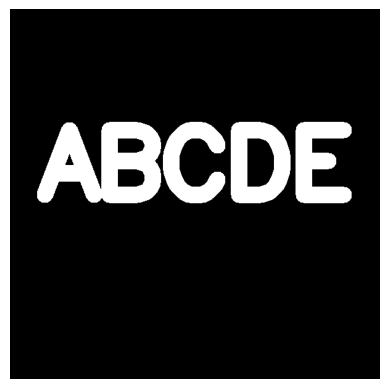

In [63]:
# Try to modify the kernel size and apply again open, close and MORPH_GRADIENT operations and compare the results 
# Modify the kernel size
modified_kernel = np.ones((10, 10), np.uint8)

# Apply the opening operation with modified kernel
opened_img_modified = cv2.morphologyEx(img, cv2.MORPH_OPEN, modified_kernel)

# Display the opened image with modified kernel
display_img(opened_img_modified)

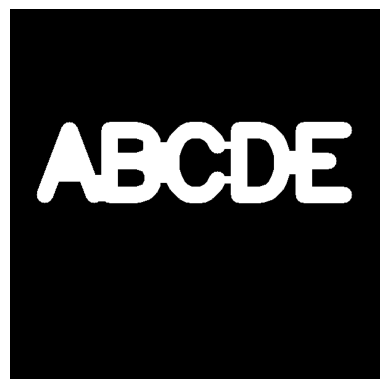

In [64]:
# Apply the closing operation with modified kernel
closed_img_modified = cv2.morphologyEx(img, cv2.MORPH_CLOSE, modified_kernel)

# Display the closed image with modified kernel
display_img(closed_img_modified)

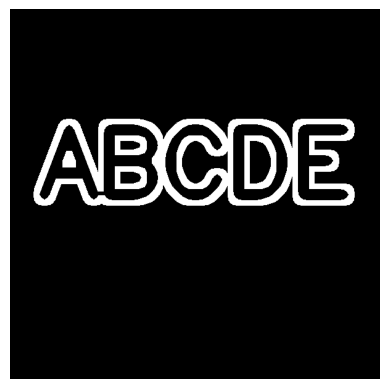

In [65]:

# Apply the MORPH_GRADIENT operation with modified kernel
gradient_img_modified = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, modified_kernel)

# Display the image after MORPH_GRADIENT operation with modified kernel
display_img(gradient_img_modified)

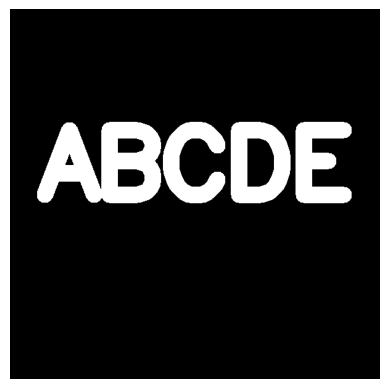

In [66]:
# Display the opened image with modified kernel
display_img(opened_img_modified)

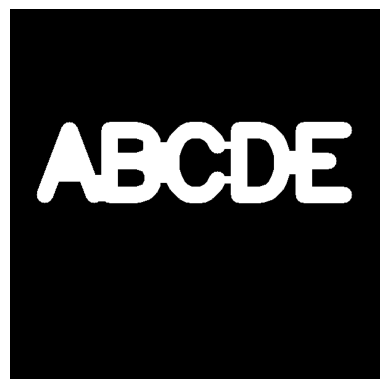

In [67]:
# Apply the closing operation with modified kernel
closed_img_modified = cv2.morphologyEx(img, cv2.MORPH_CLOSE, modified_kernel)

# Display the closed image with modified kernel
display_img(closed_img_modified)

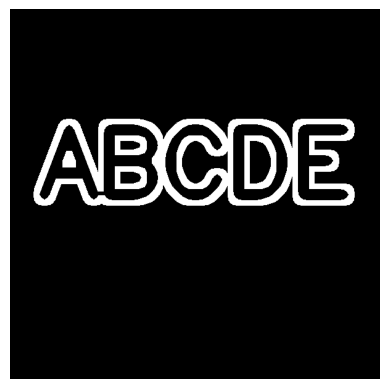

In [68]:

# Apply the MORPH_GRADIENT operation with modified kernel
gradient_img_modified = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, modified_kernel)

# Display the image after MORPH_GRADIENT operation with modified kernel
display_img(gradient_img_modified)